In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
sns.set_theme(style="white")

## Import protest data

In [2]:
# Import data from Modeling notebook
engine = create_engine('sqlite:///../data/processed/all_data.db')
with engine.begin() as connection:
    df = pd.read_sql('SELECT * FROM all_modeled_data', connection)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14558 entries, 0 to 14557
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   region                             14558 non-null  object 
 1   protestnumber                      14558 non-null  int64  
 2   protesterviolence                  14558 non-null  int64  
 3   duration_days                      14558 non-null  int64  
 4   participants                       14558 non-null  int64  
 5   participants_category              14558 non-null  object 
 6   demand_labor-wage-dispute          14558 non-null  int64  
 7   demand_land-farm-issue             14558 non-null  int64  
 8   demand_police-brutality            14558 non-null  int64  
 9   demand_political-behavior/process  14558 non-null  int64  
 10  demand_price-increases/tax-policy  14558 non-null  int64  
 11  demand_removal-of-politician       14558 non-null  int

## Correlation matrix

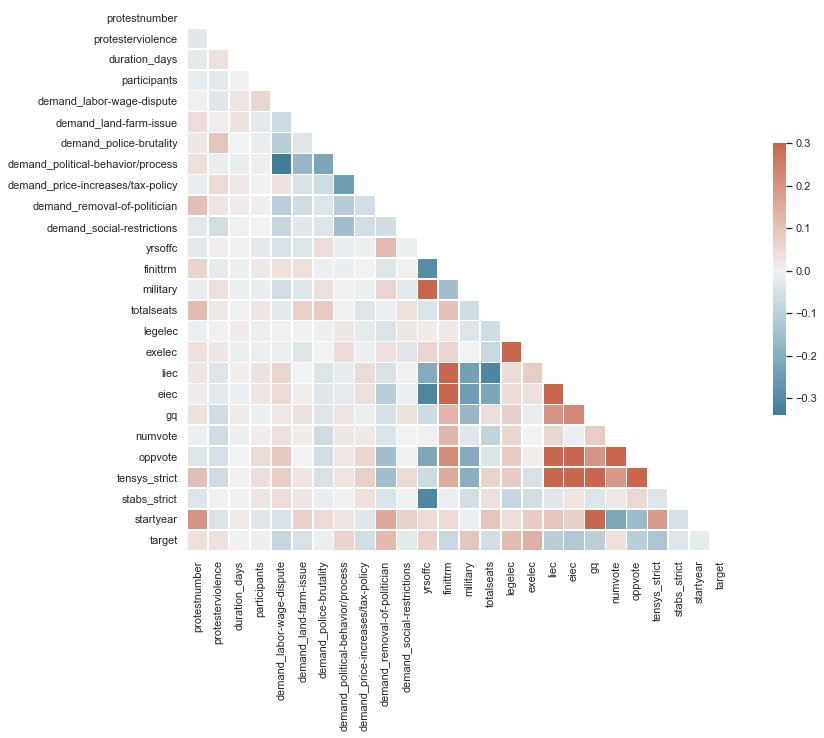

In [7]:
# Compute the correlation matrix
corr = df.drop('alternative_target', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [4]:
stop

NameError: name 'stop' is not defined

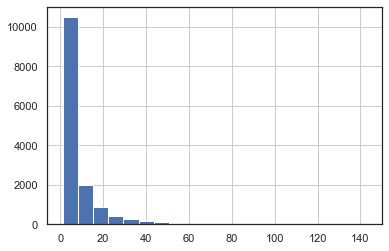

In [9]:
df.protestnumber.hist(bins=20);

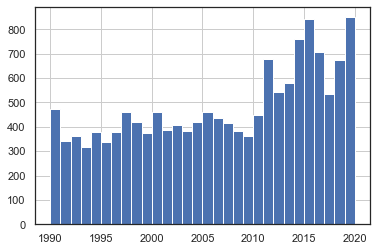

In [11]:
df.startyear.hist(bins=30);

0     12599
1       700
2       299
3       157
4       107
7        69
5        64
6        50
8        41
14       36
10       32
9        31
12       23
11       21
15       18
13       17
31       15
16       14
26       13
21       12
Name: duration_days, dtype: int64


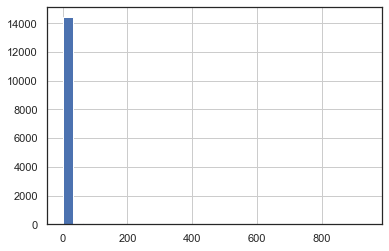

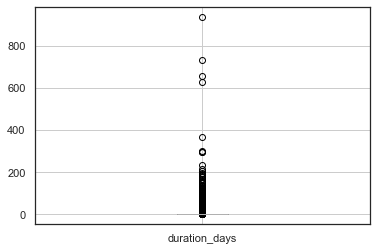

In [23]:
print(df.duration_days.value_counts()[:20])
df.duration_days.hist(bins=30);
plt.figure()
pd.DataFrame(df.duration_days).boxplot();

<AxesSubplot:>

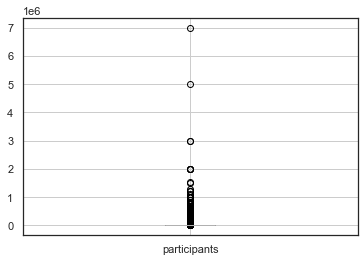

In [21]:
#df.participants.hist(bins=25)
pd.DataFrame(df.participants).boxplot()

In [29]:
df.participants_category.value_counts()

100-999      4557
50-99        3393
10000+       2427
1000-1999    2363
2000-4999    1071
5000-9999     747
Name: participants_category, dtype: int64

{'100-999': 4557,
 '50-99': 3393,
 '10000+': 2427,
 '1000-1999': 2363,
 '2000-4999': 1071,
 '5000-9999': 747}

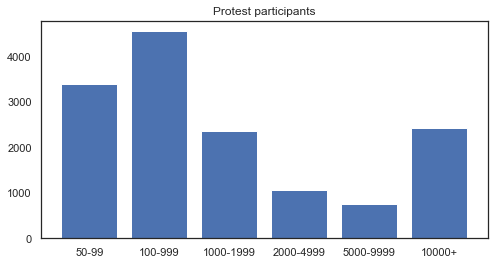

In [53]:
categories = ['50-99', '100-999', '1000-1999', '2000-4999', '5000-9999', '10000+']
participants = []

lookup = dict(df.participants_category.value_counts())
for category in categories:
    participants.append(lookup[category])

plt.figure(figsize=(8, 4))
plt.title('Protest participants')
plt.bar(categories, participants);

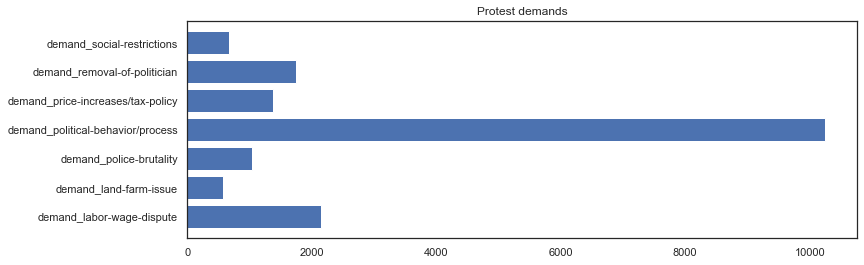

In [65]:
demands = ['demand_labor-wage-dispute', 'demand_land-farm-issue', 'demand_police-brutality', 'demand_political-behavior/process', 'demand_price-increases/tax-policy', 'demand_removal-of-politician', 'demand_social-restrictions']

plt.figure(figsize=(12, 4))
plt.barh(df[demands].sum().index, df[demands].sum().values)
plt.title('Protest demands');